# Functions, conditionals, loops, and intro to numerica methods
1. Functions 
2. Loops
3. Conditionals
4. Numerical methods

## Functions
Functions are a fundamental part of programming in Julia, allowing us to store processes in an organized and efficient way. Generally, we declare them using the `function` command, followed by () and the respective `inputs`. The most common syntax will be using function function_name(input) -> output. Here's an example:"

In [1]:
function f1(a, b)
    return a * b
end

f1 (generic function with 1 method)

Functions in Julia do not necessarily require explicitly declaring the return, but we do it to maintain some structure. As we see in the following example, the functions `f1` and `f2` are equivalent ($\approx$).

In [2]:
function f2(a, b)
    a * b
end

a = 1; b = 2
f1(a,b) ≈ f2(a,b) 

true

Using the `@time` and `@btime` (from BenchmarkTools) macros, we can test the performance and space usage of our functions.

In [3]:
using BenchmarkTools
@btime f1(a,b)
@btime f2(a,b)

  23.092 ns (0 allocations: 0 bytes)


  25.000 ns (0 allocations: 0 bytes

2

)


An important detail is that depending on how we declare our functions, they will work for scalars or arrays. For example, the function f1 does not work correctly with vectors.

In [4]:
N = 100
a = range(0,100, N)
b = randn(N)

c = f1(a,b) #Error

LoadError: MethodError: no method matching *(::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, ::Vector{Float64})

[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:587[24m[39m
[0m  *([91m::LinearAlgebra.LQ{TA, S, C} where {S<:AbstractMatrix{TA}, C<:AbstractVector{TA}}[39m, ::AbstractVecOrMat{TB}) where {TA, TB}
[0m[90m   @[39m [36mLinearAlgebra[39m [90mC:\Users\felix\AppData\Local\Programs\Julia-1.10.0\share\julia\stdlib\v1.10\LinearAlgebra\src\[39m[90m[4mlq.jl:167[24m[39m
[0m  *([91m::Number[39m, ::AbstractArray)
[0m[90m   @[39m [90mBase[39m [90m[4marraymath.jl:21[24m[39m
[0m  ...


To solve this, in this specific case, we can perform an *element-by-element* multiplication using `.*`.

In [ ]:
function f1(a, b)
    return a .* b
end

N = 100
a = range(0,100, N)
b = randn(N)

@btime c = f1(a,b);

  154.375 ns (1 allocation: 896 bytes)


A very commonly used type of function in Julia is called in-place. We create these functions to reduce the number of allocations that our code generates. 
- These functions conventionally carry the `!` sign, 
- The variable that is the output explicitly goes as an input. 
- Additionally, this array is completely replaced in the function `.=`. In this way, the element is not recreated, but replaced, which reduces the number of allocations and potentially reduces the function's execution time (check with `@btime`).



In [ ]:
function f1!(out, a, b) #a,b->out
     out .= a .* b
end

N = 100
a = range(0,100, N)
b = randn(N)

out = similar(a)
@btime f1!(out, a, b);

  139.394 ns (0 allocations: 0 bytes)


To provide more detail to the functions, we can explicitly specify the types of the inputs that the function has. The purpose of this is to have full control over what goes in and what comes out, thus avoiding potential errors. Julia slows down when we are constantly changing types, for example, if in a loop the matrix A changes from an array to a float successively, this process will potentially be slow.

In [ ]:
function f3(a::Vector{Float64}, b::Vector{Float64})
    return a .* b
end

c = f3(1.0, 1.0) #Error 

LoadError: MethodError: no method matching f3(::Float64, ::Float64)

In Julia, we can create functions without the need to explicitly use the word function. We use this mainly when our function is something simple, for example:

In [ ]:
f(x) = sin(1 / x)

f (generic function with 1 method)

Similarly, we can apply a function element by element, using the map() function.

In [ ]:
map(x -> sin(1 / x), randn(3));  # apply function to each element

Finally, in this section on functions, we will use predefined values. For example, if we have a model f(x) that includes a parameter $\alpha$, we can give it an initial value or a default value and define it at the beginning of the function.

In [ ]:
f(x, α = 1) = exp(cos(α * x))

f (generic function with 2 methods)

### Exercises
1. Create a function out-place of $f(x,y)=(a-x)^2 + b(y)^2$
2. Create a function in-place of $f(x,y)=(a-x)^2 + b(y)^2$
3. Create a grid of x and y of dimension N=100 and evaluate the functions. 
4. Test if the results are the same ($\approx$) and the performance (@btime and @time). 

## Loops
We use iterations for repetitive processes, for example, iterating from 1 to N, iterating over the elements of a vector, or over the rows and columns of a matrix. This makes it easy to repeat a process and is quite efficient in Julia.

In [ ]:
for i in 1:10
    print(i)
end


12345678910

In [ ]:
index = range(1,100)
for i in index
    print(i)
end

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100

You can create an empty element `Any[]` and place the result in it using the `push!()` function (notice, this is an in-place function).

In [ ]:
x = rand(100)
k_x = Any[]
v_x = Any[]

for (k,v) in enumerate(x)
    push!(k_x, k)
    push!(v_x, v)
end

Matrix multiplication can be done directly (A*B) or through iteration of the rows and columns.

In [ ]:
A = rand(100, 10) 
B = rand(10, 100)  

C1 = A * B;  

In [ ]:
# Inicializar matriz C con ceros
C2 = zeros(100, 100)

# Multiplicar matrices usando un loop
for i in 1:100
    for j in 1:100
        for k in 1:10
            C2[i, j] += A[i, k] * B[k, j]
        end
    end
end

C1 ≈ C2

true

Loops are a fundamental tool in Julia, and we will use them throughout the entire course. A simple example (from [QuantEcon](https://julia.quantecon.org/introduction_dynamics/scalar_dynam.html)) is, for instance, to plot the time series of capital.

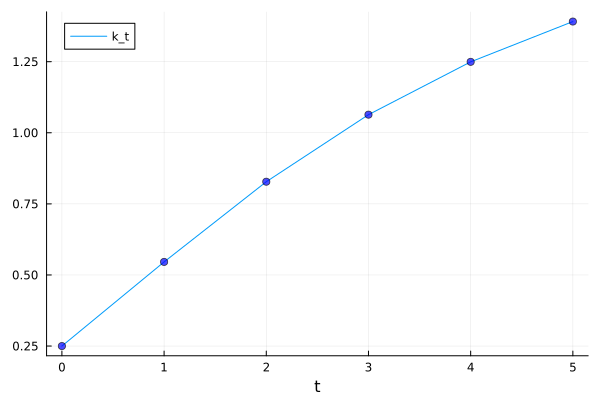

In [ ]:
using Plots
# Iterates a function from an initial condition 
function iterate_map(f, x0, T)
    x = zeros(T + 1)
    x[1] = x0
    for t in 2:(T + 1)
        x[t] = f(x[t - 1])
    end
    return x
end

function ts_plot(f, x0, T; xlabel = "t", label = "k_t")
    x = iterate_map(f, x0, T)
    plot(0:T, x; xlabel, label)
    plot!(0:T, x; seriestype = :scatter, mc = :blue, alpha = 0.7, label = nothing)
end


p = (A = 2, s = 0.3, alpha = 0.3, delta = 0.4, xmin = 0, xmax = 4)
g(k; p) = p.A * p.s * k^p.alpha + (1 - p.delta) * k
k0 = 0.25
ts_plot(k -> g(k; p), k0, 5)

## Conditionals
Conditional evaluation allows portions of code to be evaluated or not evaluated depending on the value of a boolean expression. Here is the anatomy of the if-elseif-else conditional syntax:

In [ ]:
if x < y
    println("x is less than y")
elseif x > y
    println("x is greater than y")
else
    println("x is equal to y")
end

Consider the equation $v = p+\beta v$ where $p,\beta$ are given, and $v$ is a scalar to solve. 

*This simple example can be solve like* $v=p/(1-\beta)$. 

However, we are going to try $v=f(v):=p+\beta v$ 

### While loops

In [ ]:
using LinearAlgebra
# poor style
p = 1.0 
beta = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8 # initial condition

# setup the algorithm
v_old = v_iv
normdiff = Inf
iter = 1
while normdiff > tolerance && iter <= maxiter
    v_new = p + beta * v_old # the f(v) map
    normdiff = norm(v_new - v_old)

    # replace and continue
    v_old = v_new
    iter = iter + 1
end
println("Fixed point = $v_old
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609
  |f(x) - x| = 9.181037796679448e-8 in 155 iterations


### For and if

In [ ]:
# setup the algorithm
v_old = v_iv
normdiff = Inf
iter = 1
for i in 1:maxiter
    v_new = p + beta * v_old # the f(v) map
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance # check convergence
        iter = i
        break # converged, exit loop
    end
    # replace and continue
    v_old = v_new
end
println("Fixed point = $v_old
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999081896231
  |f(x) - x| = 9.181037796679448e-8 in 154 iterations


## Excercises
1. Put the examples in functions, test the performance. 
2. Check if the functions have the same result and are the same that analytical solution $v=p/(1-\beta)$

## Numerical methods
One of the most basic numerical problems encountered in computational economics is to find the solution to a nonlinear equation or a whole system of nonlinear equations. A nonlinear equation system usually can be defined by a function

$$f(x):R^n\rightarrow R^n$$

that maps an $n$ dimensional vector $x$ into the space $R^n$. We call the solution to the linear equation system $f (x) = 0$ a root of $f$ . The root of a nonlinear equation system usually has no closed-form solution. Consequently, various numerical methods addressing the issue of root-finding have been invented.

In Julia, we find several packages for this purpose, some of them are NSolve, Optim, Optimization, ForwardDiff, Roots, among others.




### Solving non-linear systems
Example: 

$$x^2 + 2y^2 = 1 $$
$$2x^2 + y^2 = 1 $$

In [ ]:
using NLsolve

function f!(F, x)
    F[1] = x[1]^2 + 2x[2]^2 - 1
    F[2] = 2x[1]^2 + x[2]^2 - 1
end

x = nlsolve(f!, [ 0.1; 1.2], autodiff = :forward)
print(x.zero)

### Nonlinear Optimization
Example: Rosenbrock function

$f(x,y)=(a-x)^2 + b(y-x^2)^2$

In [ ]:
using Optim

f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
x_iv = [0.0, 0.0]
results = optimize(f, x_iv) # i.e. optimize(f, x_iv, NelderMead())

 * Status: success

 * Candidate solution
    Final objective value:     3.525527e-09

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    60
    f(x) calls:    117


In [ ]:
using Optimization, OptimizationOptimJL

rosenbrock(u,p) =  (p[1] - u[1])^2 + p[2] * (u[2] - u[1]^2)^2
u0 = zeros(2)
p  = [1.0,100.0]

prob = OptimizationProblem(rosenbrock,u0,p)
sol = solve(prob,NelderMead())

retcode: Success
u: 2-element Vector{Float64}:
 0.9999634355313174
 0.9999315506115275

## Exercises
1. Compare the results of the three methods
2. Plot the 3D plane of f(x,y),x,y. 
3. Add to the plot the solution of the 3 methods. 
4. Solve the following problem using someone of the non-linear techniques. 

Two firms compete in a simple Cournot duopoly with the inverse demand and the cost functions 

$$P(q) = q^{-1/\eta} $$
$$C_k(q_k) = \frac{c_k}{2} q_k^2 \quad \text{for firm } k = 1, 2 $$
$$q = q_1 + q_2$$



Given the profit functions of the two firms

$$\pi_k(q_1, q_2) = P(q_1 + q_2)q_k - C_k(q_k)$$

each firm $k$ takes the other firm’s output as given and chooses its own output level in order to solve

$$\frac{\partial \pi_k}{\partial q_k} = f(q) = \left(q_1 + q_2\right)^{-1/\eta} - \frac{1}{\eta} \left(q_1 + q_2\right)^{-1/\eta -1}q_k - c_kq_k = 0 \quad \text{with } k = 1, 2.$$
